In [1]:
!pip install mediapipe opencv-python pandas scikit-learn

  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/b1/e9/5e59dec4830a9a0913cda2910f2c829065f447af7efc8338d6ff07c1f27c/mediapipe-0.10.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Obtaining dependency information for flatbuffers>=2.0 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/05/33/5a6436146bda09c69decc456c

In [1]:
import mediapipe as mp # Import mediapipe|
import cv2 # Import opencv

In [2]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [78]:
cap = cv2.VideoCapture(1)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)

        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )

        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )

        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [3]:
import csv
import os
import numpy as np

In [6]:
results.pose_landmarks

landmark {
  x: 0.54709256
  y: 0.33422536
  z: -0.7717258
  visibility: 0.99958235
}
landmark {
  x: 0.5593753
  y: 0.2809116
  z: -0.72001106
  visibility: 0.9992682
}
landmark {
  x: 0.5732781
  y: 0.28419748
  z: -0.7199524
  visibility: 0.9993597
}
landmark {
  x: 0.5859504
  y: 0.28759745
  z: -0.7198879
  visibility: 0.999289
}
landmark {
  x: 0.5102944
  y: 0.28283605
  z: -0.73252857
  visibility: 0.9993054
}
landmark {
  x: 0.49225187
  y: 0.2873751
  z: -0.73194015
  visibility: 0.99930996
}
landmark {
  x: 0.47531503
  y: 0.2944248
  z: -0.7324796
  visibility: 0.99928355
}
landmark {
  x: 0.59759647
  y: 0.33274773
  z: -0.39487466
  visibility: 0.99920875
}
landmark {
  x: 0.44763216
  y: 0.34449607
  z: -0.43633652
  visibility: 0.9995835
}
landmark {
  x: 0.57077587
  y: 0.4033059
  z: -0.6528703
  visibility: 0.9994845
}
landmark {
  x: 0.5148687
  y: 0.40511778
  z: -0.6638583
  visibility: 0.99970955
}
landmark {
  x: 0.7374638
  y: 0.69996476
  z: -0.23390105
  visi

In [7]:
num_coords = len(results.pose_landmarks.landmark)+len(results.face_landmarks.landmark)
num_coords

501

In [8]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [9]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [4]:
class_name = "Inattentive"

In [80]:
#with open('test.csv', mode='w', newline='') as f:
#    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#    csv_writer.writerow(landmarks)

In [83]:
cap = cv2.VideoCapture(1)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('coords.csv')

In [6]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,Attentive,0.679495,0.320061,-1.426553,0.998223,0.719393,0.267550,-1.323621,0.995561,0.743455,...,0.009690,0.0,0.774802,0.257927,0.039875,0.0,0.780994,0.252410,0.041198,0.0
1,Attentive,0.685251,0.320307,-1.069335,0.998378,0.720407,0.267939,-0.984831,0.995943,0.743782,...,0.008038,0.0,0.778947,0.261841,0.038582,0.0,0.785545,0.255938,0.039967,0.0
2,Attentive,0.694760,0.322506,-1.022052,0.998524,0.725898,0.271482,-0.951072,0.996311,0.748186,...,0.009182,0.0,0.781795,0.267459,0.039027,0.0,0.788308,0.262161,0.040384,0.0
3,Attentive,0.695915,0.322677,-1.027281,0.998657,0.727599,0.272180,-0.952108,0.996647,0.749877,...,0.009139,0.0,0.785282,0.269759,0.038974,0.0,0.792054,0.263877,0.040377,0.0
4,Attentive,0.698385,0.322418,-0.978234,0.998769,0.729621,0.272116,-0.905468,0.996932,0.751750,...,0.008901,0.0,0.790280,0.269615,0.039794,0.0,0.796864,0.264468,0.041172,0.0


In [7]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
52160,Inattentive,0.401484,0.617875,-0.459330,0.999194,0.428668,0.545427,-0.485864,0.998443,0.443822,...,-0.000441,0.0,0.465378,0.515487,-0.011296,0.0,0.470579,0.503994,-0.012801,0.0
52161,Inattentive,0.401393,0.617125,-0.466889,0.999169,0.428625,0.544857,-0.489893,0.998382,0.443786,...,0.000115,0.0,0.464977,0.515108,-0.010569,0.0,0.470173,0.503543,-0.012052,0.0
52162,Inattentive,0.401126,0.616688,-0.483270,0.999145,0.428396,0.544464,-0.503904,0.998336,0.443577,...,0.000574,0.0,0.464601,0.514534,-0.010524,0.0,0.469821,0.502954,-0.012047,0.0
52163,Inattentive,0.400723,0.616777,-0.492067,0.999123,0.428088,0.544489,-0.511918,0.998299,0.443290,...,-0.000052,0.0,0.465229,0.513920,-0.011217,0.0,0.470537,0.502327,-0.012721,0.0
52164,Inattentive,0.399991,0.616730,-0.489725,0.999155,0.427600,0.544361,-0.510355,0.998358,0.442813,...,0.000227,0.0,0.463454,0.513728,-0.011591,0.0,0.468650,0.501955,-0.013161,0.0


In [8]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [9]:
X

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,0.679495,0.320061,-1.426553,0.998223,0.719393,0.267550,-1.323621,0.995561,0.743455,0.277934,...,0.009690,0.0,0.774802,0.257927,0.039875,0.0,0.780994,0.252410,0.041198,0.0
1,0.685251,0.320307,-1.069335,0.998378,0.720407,0.267939,-0.984831,0.995943,0.743782,0.277900,...,0.008038,0.0,0.778947,0.261841,0.038582,0.0,0.785545,0.255938,0.039967,0.0
2,0.694760,0.322506,-1.022052,0.998524,0.725898,0.271482,-0.951072,0.996311,0.748186,0.280356,...,0.009182,0.0,0.781795,0.267459,0.039027,0.0,0.788308,0.262161,0.040384,0.0
3,0.695915,0.322677,-1.027281,0.998657,0.727599,0.272180,-0.952108,0.996647,0.749877,0.280675,...,0.009139,0.0,0.785282,0.269759,0.038974,0.0,0.792054,0.263877,0.040377,0.0
4,0.698385,0.322418,-0.978234,0.998769,0.729621,0.272116,-0.905468,0.996932,0.751750,0.280218,...,0.008901,0.0,0.790280,0.269615,0.039794,0.0,0.796864,0.264468,0.041172,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52160,0.401484,0.617875,-0.459330,0.999194,0.428668,0.545427,-0.485864,0.998443,0.443822,0.539325,...,-0.000441,0.0,0.465378,0.515487,-0.011296,0.0,0.470579,0.503994,-0.012801,0.0
52161,0.401393,0.617125,-0.466889,0.999169,0.428625,0.544857,-0.489893,0.998382,0.443786,0.538818,...,0.000115,0.0,0.464977,0.515108,-0.010569,0.0,0.470173,0.503543,-0.012052,0.0
52162,0.401126,0.616688,-0.483270,0.999145,0.428396,0.544464,-0.503904,0.998336,0.443577,0.538467,...,0.000574,0.0,0.464601,0.514534,-0.010524,0.0,0.469821,0.502954,-0.012047,0.0
52163,0.400723,0.616777,-0.492067,0.999123,0.428088,0.544489,-0.511918,0.998299,0.443290,0.538497,...,-0.000052,0.0,0.465229,0.513920,-0.011217,0.0,0.470537,0.502327,-0.012721,0.0


In [10]:
y

0          Attentive
1          Attentive
2          Attentive
3          Attentive
4          Attentive
            ...     
52160    Inattentive
52161    Inattentive
52162    Inattentive
52163    Inattentive
52164    Inattentive
Name: class, Length: 52165, dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


In [12]:
X_test

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
15726,0.514292,0.202639,-1.858987,0.997706,0.564274,0.167500,-1.730646,0.994076,0.592279,0.176764,...,0.029472,0.0,0.624595,0.155800,0.055122,0.0,0.632861,0.147882,0.056789,0.0
28908,0.412019,0.441209,-0.573328,0.999859,0.429652,0.397646,-0.548414,0.999760,0.445658,0.397711,...,0.003704,0.0,0.470840,0.389487,0.017003,0.0,0.474353,0.386152,0.017438,0.0
5648,0.452206,0.430088,-1.810472,0.996674,0.495356,0.359133,-1.694434,0.993059,0.526476,0.362019,...,0.008858,0.0,0.571380,0.292855,0.034368,0.0,0.580567,0.281974,0.035503,0.0
13421,0.599559,0.387895,-0.573607,0.986148,0.591645,0.352917,-0.468781,0.988446,0.603480,0.360872,...,0.001705,0.0,0.560296,0.188901,-0.020917,0.0,0.571746,0.178224,-0.023154,0.0
12395,0.438482,0.740071,-0.782178,0.999228,0.483539,0.681259,-0.744906,0.998752,0.505813,0.683909,...,-0.006231,0.0,0.555794,0.660076,-0.008040,0.0,0.562141,0.653820,-0.009215,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11402,0.286808,0.490597,-1.207878,0.997410,0.308899,0.412870,-1.164596,0.996459,0.330517,0.413721,...,-0.001494,0.0,0.268029,0.359799,-0.034231,0.0,0.278227,0.354904,-0.037715,0.0
45336,0.533619,0.624182,-0.936663,0.999491,0.555964,0.550500,-0.863931,0.999466,0.572782,0.552494,...,0.003315,0.0,0.596000,0.551488,0.024148,0.0,0.600778,0.544109,0.025029,0.0
38213,0.560514,0.724572,-0.468575,0.999000,0.554716,0.662968,-0.421433,0.998136,0.561415,0.664415,...,0.010860,0.0,0.584021,0.674955,0.043333,0.0,0.586858,0.669654,0.045563,0.0
18656,0.393532,0.684186,-1.009792,0.997780,0.413481,0.603788,-1.070427,0.996432,0.428762,0.601097,...,-0.024673,0.0,0.476962,0.567604,-0.055826,0.0,0.483827,0.555234,-0.059427,0.0


In [13]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [14]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [15]:
pipelines.keys()

dict_keys(['lr', 'rc', 'rf', 'gb'])

In [16]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

M:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [18]:
fit_models['gb'].predict(X_test)

array(['Attentive', 'Attentive', 'Inattentive', ..., 'Attentive',
       'Attentive', 'Attentive'], dtype=object)

In [14]:
import pickle 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, classification_report, auc, f1_score, recall_score, precision_score, cohen_kappa_score, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [20]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))    

lr 0.9796339050131926
rc 0.9852407651715039
rf 0.9990105540897097
gb 0.9973614775725593


In [21]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_test, yhat).ravel()
    specificity = tn / (tn + fp)
    
    print(f"{algo} Specificity: {specificity:.4f}")


lr Specificity: 0.9889
rc Specificity: 0.9962
rf Specificity: 0.9995
gb Specificity: 0.9985


In [22]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    
    # Specify the correct pos_label based on your class labels
    pos_label = 'Attentive'  # Change this to 'Inattentive' if needed
    
    precision = precision_score(y_test, yhat, pos_label=pos_label)
    print(f"{algo} Precision: {precision}")

lr Precision: 0.9778938906752411
rc Precision: 0.9798773987206824
rf Precision: 0.9989167230873393
gb Precision: 0.997158706534975


In [23]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    
    # Specify the correct pos_label based on your class labels
    pos_label = 'Inattentive'  # Change this to 'Inattentive' if needed
    
    precision = precision_score(y_test, yhat, pos_label=pos_label)
    print(f"{algo} Precision: {precision}")

lr Precision: 0.9824185248713551
rc Precision: 0.9939446366782007
rf Precision: 0.999156651908075
gb Precision: 0.997677855182605


In [24]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    
    # Specify the correct pos_label based on your class labels
    pos_label = 'Attentive'  # Change this to 'Inattentive' if needed
    
    precision = recall_score(y_test, yhat, pos_label=pos_label)
    print(f"{algo} recall_score: {precision}")

lr recall_score: 0.9888903942555209
rc recall_score: 0.9962064760872511
rf recall_score: 0.9994580680124644
gb recall_score: 0.9985096870342772


In [25]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    
    # Specify the correct pos_label based on your class labels
    pos_label = 'Inattentive'  # Change this to 'Inattentive' if needed
    
    precision = recall_score(y_test, yhat, pos_label=pos_label)
    print(f"{algo} recall_score: {precision}")

lr recall_score: 0.965241204971561
rc recall_score: 0.9681904360648831
rf recall_score: 0.9983147250895302
gb recall_score: 0.9955761533600168


In [26]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    
    # Specify the correct pos_label based on your class labels
    pos_label = 'Attentive'  # Change this to 'Inattentive' if needed
    
    precision = f1_score(y_test, yhat, pos_label=pos_label)
    print(f"{algo} f1_score: {precision}")

lr f1_score: 0.9833614011451666
rc f1_score: 0.9879744709439033
rf f1_score: 0.9991873222267372
gb f1_score: 0.9978337395071758


In [27]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    
    # Specify the correct pos_label based on your class labels
    pos_label = 'Inattentive'  # Change this to 'Inattentive' if needed
    
    precision = f1_score(y_test, yhat, pos_label=pos_label)
    print(f"{algo} f1_score: {precision}")

lr f1_score: 0.9737541175220487
rc f1_score: 0.9808985167004588
rf f1_score: 0.9987355110642782
gb f1_score: 0.9966258962463095


In [28]:
fit_models['rf'].predict(X_test)

array(['Attentive', 'Attentive', 'Inattentive', ..., 'Attentive',
       'Attentive', 'Attentive'], dtype=object)

In [29]:
y_test

29009      Attentive
34384      Attentive
706      Inattentive
32195      Attentive
13970    Inattentive
            ...     
4662       Attentive
3155       Attentive
10961      Attentive
7319       Attentive
5815       Attentive
Name: class, Length: 12128, dtype: object

In [31]:
with open('attentiveness_detection_RF_7th_verstion_.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

In [15]:
with open('attentiveness_detection_RF_6th_verstion_.pkl', 'rb') as f:
    model = pickle.load(f)

In [16]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [17]:
X_test

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
15726,0.514292,0.202639,-1.858987,0.997706,0.564274,0.167500,-1.730646,0.994076,0.592279,0.176764,...,0.029472,0.0,0.624595,0.155800,0.055122,0.0,0.632861,0.147882,0.056789,0.0
28908,0.412019,0.441209,-0.573328,0.999859,0.429652,0.397646,-0.548414,0.999760,0.445658,0.397711,...,0.003704,0.0,0.470840,0.389487,0.017003,0.0,0.474353,0.386152,0.017438,0.0
5648,0.452206,0.430088,-1.810472,0.996674,0.495356,0.359133,-1.694434,0.993059,0.526476,0.362019,...,0.008858,0.0,0.571380,0.292855,0.034368,0.0,0.580567,0.281974,0.035503,0.0
13421,0.599559,0.387895,-0.573607,0.986148,0.591645,0.352917,-0.468781,0.988446,0.603480,0.360872,...,0.001705,0.0,0.560296,0.188901,-0.020917,0.0,0.571746,0.178224,-0.023154,0.0
12395,0.438482,0.740071,-0.782178,0.999228,0.483539,0.681259,-0.744906,0.998752,0.505813,0.683909,...,-0.006231,0.0,0.555794,0.660076,-0.008040,0.0,0.562141,0.653820,-0.009215,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11402,0.286808,0.490597,-1.207878,0.997410,0.308899,0.412870,-1.164596,0.996459,0.330517,0.413721,...,-0.001494,0.0,0.268029,0.359799,-0.034231,0.0,0.278227,0.354904,-0.037715,0.0
45336,0.533619,0.624182,-0.936663,0.999491,0.555964,0.550500,-0.863931,0.999466,0.572782,0.552494,...,0.003315,0.0,0.596000,0.551488,0.024148,0.0,0.600778,0.544109,0.025029,0.0
38213,0.560514,0.724572,-0.468575,0.999000,0.554716,0.662968,-0.421433,0.998136,0.561415,0.664415,...,0.010860,0.0,0.584021,0.674955,0.043333,0.0,0.586858,0.669654,0.045563,0.0
18656,0.393532,0.684186,-1.009792,0.997780,0.413481,0.603788,-1.070427,0.996432,0.428762,0.601097,...,-0.024673,0.0,0.476962,0.567604,-0.055826,0.0,0.483827,0.555234,-0.059427,0.0


In [18]:
y_pred = model.predict(X_test)

# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_mat}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')




Accuracy: 0.7982747603833866
Confusion Matrix:
[[5912 3152]
 [   5 6581]]
Classification Report:
              precision    recall  f1-score   support

   Attentive       1.00      0.65      0.79      9064
 Inattentive       0.68      1.00      0.81      6586

    accuracy                           0.80     15650
   macro avg       0.84      0.83      0.80     15650
weighted avg       0.86      0.80      0.80     15650



In [19]:
print("Shape of y_train:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_train: (15650,)
Shape of y_pred: (15650,)


In [20]:
from sklearn.preprocessing import LabelEncoder 


label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_test)
y_pred_numeric = label_encoder.transform(y_pred)

# Now you can use regression metrics
mae = mean_absolute_error(y_train_numeric, y_pred_numeric)
mse = mean_squared_error(y_train_numeric, y_pred_numeric)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
r2 = r2_score(y_train_numeric, y_pred_numeric)

print(f'R-squared (R2): {r2}')




# Make predictions using the loaded model
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train_numeric, y_pred_numeric))

print(f'Root Mean Squared Error (RMSE): {rmse}')

NameError: name 'y_pred' is not defined

In [23]:
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)

# Make predictions using the loaded model
y_pred = model.predict(X_test)

# Transform the predicted values using the label encoder
y_pred_numeric = label_encoder.transform(y_pred)

# Now you can use regression metrics
mae = mean_absolute_error(y_test_numeric, y_pred_numeric)
mse = mean_squared_error(y_test_numeric, y_pred_numeric)
r2 = r2_score(y_test_numeric, y_pred_numeric)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_numeric, y_pred_numeric))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.20172523961661343
Mean Squared Error (MSE): 0.20172523961661343
R-squared (R2): 0.17234889247270624
Root Mean Squared Error (RMSE): 0.4491383301574398


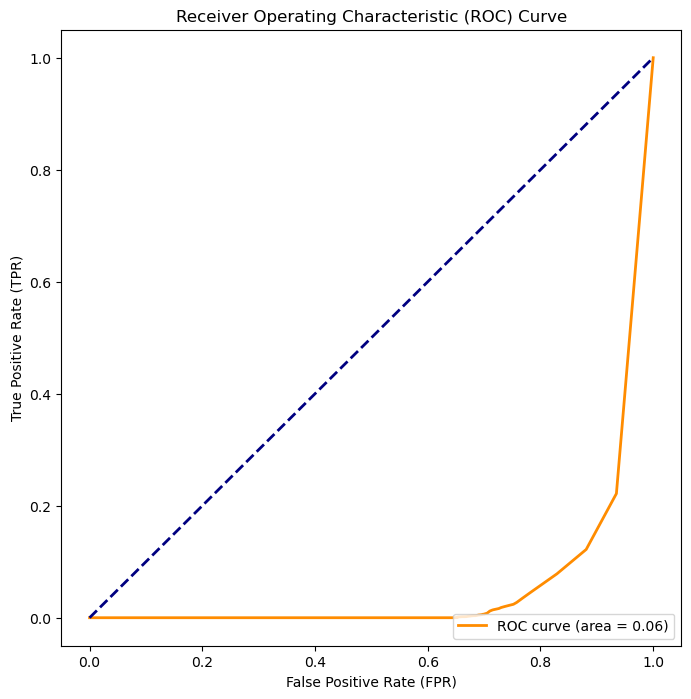

In [21]:
# Evaluate the model

# Convert string labels to binary (0 and 1)
label_encoder = LabelEncoder()
y_true_binary = label_encoder.fit_transform(y_test)



# Assuming you have the predicted probabilities for the positive class
y_probs_positive_class = model.predict_proba(X_test)[:, 0]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_binary, y_probs_positive_class)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

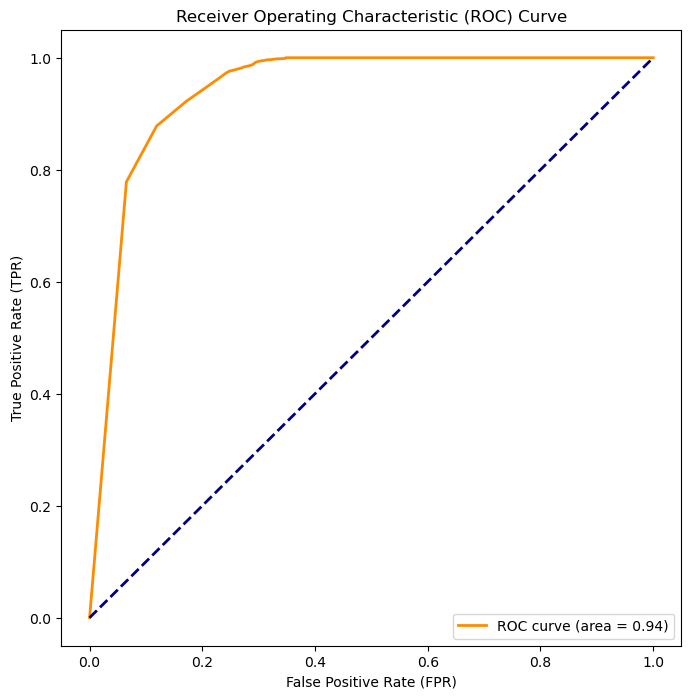

AUC: 0.94


In [22]:
y_probs_positive_class = model.predict_proba(X_test)[:, 1]
label_encoder = LabelEncoder()
y_true_binary = label_encoder.fit_transform(y_test)



# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_binary, y_probs_positive_class)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.2f}')

In [23]:
y_true_binary

array([1, 0, 0, ..., 1, 1, 0])

In [24]:
# Find misclassified instances
misclassified_instances = [(true_label, pred_label) for true_label, pred_label in zip(y_test, y_pred) if true_label != pred_label]

print("\nMisclassified Instances:")
for index, (true_label, pred_label) in enumerate(misclassified_instances):
    print(f"Instance {index + 1}: True label = {true_label}, Predicted label = {pred_label}")

# Total number of misclassified instances
total_misclassified_instances = len(misclassified_instances)
print(f"\nTotal number of misclassified instances: {total_misclassified_instances}")




Misclassified Instances:
Instance 1: True label = Attentive, Predicted label = Inattentive
Instance 2: True label = Attentive, Predicted label = Inattentive
Instance 3: True label = Attentive, Predicted label = Inattentive
Instance 4: True label = Attentive, Predicted label = Inattentive
Instance 5: True label = Attentive, Predicted label = Inattentive
Instance 6: True label = Attentive, Predicted label = Inattentive
Instance 7: True label = Attentive, Predicted label = Inattentive
Instance 8: True label = Attentive, Predicted label = Inattentive
Instance 9: True label = Attentive, Predicted label = Inattentive
Instance 10: True label = Attentive, Predicted label = Inattentive
Instance 11: True label = Attentive, Predicted label = Inattentive
Instance 12: True label = Attentive, Predicted label = Inattentive
Instance 13: True label = Attentive, Predicted label = Inattentive
Instance 14: True label = Attentive, Predicted label = Inattentive
Instance 15: True label = Attentive, Predicte

In [27]:
# Assuming you have y_true and y_pred for binary classification
# Convert string labels to binary (0 and 1)
label_encoder = LabelEncoder()
y_true_binary = label_encoder.fit_transform(y_test)
y_pred_binary = label_encoder.transform(y_pred)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true_binary, y_pred_binary)

# Calculate percentages
confusion_mat_percentage = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
confusion_mat_percentage = confusion_mat_percentage * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=['Inattentive', 'Attentive'], yticklabels=['Inattentive', 'Attentive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix (%)')




NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

In [28]:
# Calculate percentages
confusion_mat_percentage = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
confusion_mat_percentage = confusion_mat_percentage * 100



In [29]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy')

print ("cross validation scores", cv_scores  )
print ("ave accuracy", cv_scores.mean())


KeyboardInterrupt



In [30]:
# Assuming you have y_true and y_pred for binary classification
# Convert string labels to binary (0 and 1)
label_encoder = LabelEncoder()
y_true_binary = label_encoder.fit_transform(y_test)
y_pred_binary = label_encoder.transform(y_pred)

# Calculate precision, recall, and F1 score for each class
precision_attentive = precision_score(y_true_binary, y_pred_binary, pos_label=1)
recall_attentive = recall_score(y_true_binary, y_pred_binary, pos_label=1)
f1_attentive = f1_score(y_true_binary, y_pred_binary, pos_label=1)

precision_inattentive = precision_score(y_true_binary, y_pred_binary, pos_label=0)
recall_inattentive = recall_score(y_true_binary, y_pred_binary, pos_label=0)
f1_inattentive = f1_score(y_true_binary, y_pred_binary, pos_label=0)

# Calculate micro, macro, and weighted averages
precision_micro = precision_score(y_true_binary, y_pred_binary, average='micro')
recall_micro = recall_score(y_true_binary, y_pred_binary, average='micro')
f1_micro = f1_score(y_true_binary, y_pred_binary, average='micro')

precision_macro = precision_score(y_true_binary, y_pred_binary, average='macro')
recall_macro = recall_score(y_true_binary, y_pred_binary, average='macro')
f1_macro = f1_score(y_true_binary, y_pred_binary, average='macro')

precision_weighted = precision_score(y_true_binary, y_pred_binary, average='weighted')
recall_weighted = recall_score(y_true_binary, y_pred_binary, average='weighted')
f1_weighted = f1_score(y_true_binary, y_pred_binary, average='weighted')

print(f'Precision for Attentive: {precision_attentive}')
print(f'Recall for Attentive: {recall_attentive}')
print(f'F1 Score for Attentive: {f1_attentive}')

print(f'Precision for Inattentive: {precision_inattentive}')
print(f'Recall for Inattentive: {recall_inattentive}')
print(f'F1 Score for Inattentive: {f1_inattentive}')

print(f'Micro-Average Precision: {precision_micro}')
print(f'Micro-Average Recall: {recall_micro}')
print(f'Micro-Average F1 Score: {f1_micro}')

print(f'Macro-Average Precision: {precision_macro}')
print(f'Macro-Average Recall: {recall_macro}')
print(f'Macro-Average F1 Score: {f1_macro}')

print(f'Weighted-Average Precision: {precision_weighted}')
print(f'Weighted-Average Recall: {recall_weighted}')
print(f'Weighted-Average F1 Score: {f1_weighted}')

Precision for Attentive: 0.6761532929209905
Recall for Attentive: 0.9992408138475555
F1 Score for Attentive: 0.8065445186592317
Precision for Inattentive: 0.999154977184384
Recall for Inattentive: 0.6522506619593998
F1 Score for Inattentive: 0.7892664041118752
Micro-Average Precision: 0.7982747603833866
Micro-Average Recall: 0.7982747603833866
Micro-Average F1 Score: 0.7982747603833866
Macro-Average Precision: 0.8376541350526872
Macro-Average Recall: 0.8257457379034776
Macro-Average F1 Score: 0.7979054613855534
Weighted-Average Precision: 0.8632259616854249
Weighted-Average Recall: 0.7982747603833866
Weighted-Average F1 Score: 0.7965375646491845


In [31]:
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)                                                                           
print("Accuracy:", accuracy)

# Calculate specificity
confusion = confusion_matrix(y_test, y_pred)        
true_negative = confusion[0, 0]
false_positive = confusion[0, 1]
specificity = true_negative / (true_negative + false_positive)
print("Specificity:", specificity)

print(true_negative, false_positive)

kappa = cohen_kappa_score(y_test, y_pred)
print(f'Kappa: {kappa}')


print('Inattentive')
positive_label = 'Inattentive'

# Convert string labels to binary labels based on the positive class
y_test_binary = [1 if label == positive_label else 0 for label in y_test]
y_pred_binary = [1 if label == positive_label else 0 for label in y_pred]

# Calculate precision, recall, and F1 Score
precision = precision_score(y_test_binary, y_pred_binary)                                                           
recall = recall_score(y_test_binary, y_pred_binary)                                                               
f1 = f1_score(y_test_binary, y_pred_binary)                                                                         

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

positive_label = 'Attentive'
print('Attentive')
# Convert string labels to binary labels based on the positive class
y_test_binary = [1 if label == positive_label else 0 for label in y_test]
y_pred_binary = [1 if label == positive_label else 0 for label in y_pred]

# Calculate precision, recall, and F1 Score
precision = precision_score(y_test_binary, y_pred_binary)                                                   
recall = recall_score(y_test_binary, y_pred_binary)                                                             
f1 = f1_score(y_test_binary, y_pred_binary)                                                                         

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7982747603833866
Specificity: 0.6522506619593998
5912 3152
Kappa: 0.611547039729152
Inattentive
Precision: 0.6761532929209905
Recall: 0.9992408138475555
F1 Score: 0.8065445186592317
Attentive
Precision: 0.999154977184384
Recall: 0.6522506619593998
F1 Score: 0.7892664041118752


In [ ]:
# Confusion matrix values
TP = 6581
FP = 3152
FN = 5
TN = 5912

# Calculate total
total = TP + FP + FN + TN

# Calculate percentages
percentage_TP = (TP / total) * 100
percentage_FP = (FP / total) * 100
percentage_FN = (FN / total) * 100
percentage_TN = (TN / total) * 100

# Print percentages
print(f"Percentage of True Positives (TP): {percentage_TP:.2f}%")
print(f"Percentage of False Positives (FP): {percentage_FP:.2f}%")
print(f"Percentage of False Negatives (FN): {percentage_FN:.2f}%")
print(f"Percentage of True Negatives (TN): {percentage_TN:.2f}%")


# Calculate Matthews Correlation Coefficient
mcc_numerator = (TP * TN) - (FP * FN)
mcc_denominator = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))**0.5

mcc = mcc_numerator / mcc_denominator if mcc_denominator != 0 else 0

print(f'Matthews Correlation Coefficient (MCC): {mcc:.4f}')


TPR = TP / (TP + FN)

# Calculate False Positive Rate (False Alarm Rate)
FPR = 1 - (TN / (TN + FP))

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Error Rate
error_rate = 1 - accuracy

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate F-measure
recall = TPR  # Recall is the same as TPR
f_measure = 2 / ((1 / precision) + (1 / recall))

# Print the calculated metrics with all decimal places
print(f"True Positive Rate (TPR)/Recall: {TPR:.6f}")
print(f"False Positive Rate (FPR): {FPR:.6f}")
print(f"Specificity: {specificity:.6f}")
print(f"Accuracy: {accuracy:.6f}")
print(f"Error Rate: {error_rate:.6f}")
print(f"Precision: {precision:.6f}")
print(f"F-measure: {f_measure:.6f}")

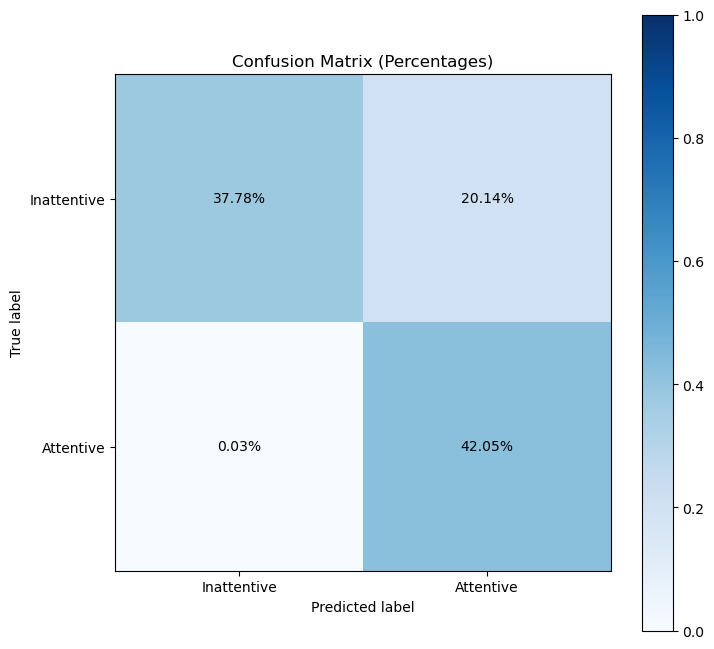

In [32]:
# Confusion matrix values
TP = 6581
FP = 3152
FN = 5
TN = 5912

# Calculate total
total = TP + FP + FN + TN

# Create confusion matrix with percentages
confusion_matrix_values = np.array([[TN / total, FP / total], [FN / total, TP / total]])

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(confusion_matrix_values, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix (Percentages)')
plt.colorbar()

# Set axis labels
classes = ['Inattentive', 'Attentive']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, f"{confusion_matrix_values[i][j]*100:.2f}%", ha='center', va='center',
                 color='white' if confusion_matrix_values[i][j] > 0.5 else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [39]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss

# Confusion matrix values
TP = 6581
FP = 3152
FN = 5
TN = 5912

# Load the trained pipeline
with open('attentiveness_detection_RF_6th_verstion_.pkl', 'rb') as f:
    pipeline = pickle.load(f)

# Assuming the last step in your pipeline is the RandomForestClassifier
rf_model = pipeline.steps[-1][1]

# Check if the model in the pipeline is a RandomForestClassifier
if isinstance(rf_model, RandomForestClassifier):
    # Get feature importances
    feature_importances = rf_model.feature_importances_

    # Replace dummy features with feature importances
    features = [feature_importances]

    # Get the names of the features (assuming you have feature names)
    # Replace this with your actual feature names
    feature_names = ["feature1", "feature2", "feature3"]

    # Print feature importances
    for feature, importance in zip(feature_names, feature_importances):
        print(f"{feature}: {importance:.4f}")

    # Get predicted probabilities
    predicted_probabilities = pipeline.predict_proba(features)[:, 1]  # Assuming binary classification

    # Calculate log loss
    logloss = log_loss([1 if label == 'positive' else 0 for label in pipeline.classes_], predicted_probabilities)

    print(f"Log Loss: {logloss:.6f}")
else:
    print("The last step in the pipeline is not a RandomForestClassifier.")



feature1: 0.0000
feature2: 0.0002
feature3: 0.0001


M:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [1, 2]

In [28]:
cap = cv2.VideoCapture(1)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row
            
#             # Append class name 
#             row.insert(0, class_name)
            
#             # Export to CSV
#             with open('coords.csv', mode='a', newline='') as f:
#                 csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                 csv_writer.writerow(row) 

            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
            
            # Grab ear coords
            #coords = tuple(np.multiply(
            #                np.array(
            #                    (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
            #                     results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
            #            , [640,480]).astype(int))
            #
            #cv2.rectangle(image, 
            #              (coords[0], coords[1]+5), 
            #              (coords[0]+len(body_language_class)*20, coords[1]-30), 
            #              (245, 117, 16), -1)
            #cv2.putText(image, body_language_class, coords, 
            #            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            #
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                       , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [28]:
tuple(np.multiply(np.array((results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y)), [640,480]).astype(int))

(459, 261)

In [18]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
calibrated_model.fit(X_train, y_train)
y_pred_probabilities = calibrated_model.predict_proba(X_test)

In [43]:
pip install neptune-client

  Obtaining dependency information for neptune-client from https://files.pythonhosted.org/packages/c2/7f/1b7d7c0faffc6ed69d4982662f415a70b4bac9ea4506296c27cf42142f27/neptune_client-1.8.6-py3-none-any.whl.metadata
  Obtaining dependency information for GitPython>=2.0.8 from https://files.pythonhosted.org/packages/8d/c4/82b858fb6483dfb5e338123c154d19c043305b01726a67d89532b8f8f01b/GitPython-3.1.40-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
     ---------------------------------------- 151.7/151.7 kB ? eta 0:00:00
  Obtaining dependency information for bravado-core>=5.16.1 from https://files.pythonhosted.org/packages/5f/26/7fdeaa8b87bbf2a7d05230d4e9f40b232aff4527fe2d582aa8d4d56cee88/bravado_core-6.1.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for simplejson from https://files.pythonhosted.org/packages/b6/8e/3e12d122dfdf549a8d12eaf39954ee39f2027060aa38b63430f8ab3244e7/simplejson-3.19.2-cp311-cp311-win_amd64.whl.m

In [22]:
from sklearn.metrics import log_loss
import neptune.new as neptune

# Assuming y_pred contains probability values


# Assuming y_test contains string labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
loss = log_loss(y_test_encoded, y_pred_probabilities)


run = neptune.init_run(
    project="joshua.joy.crucis/Test",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiNjU4ZTJiMi0zZTVkLTQ2ZGQtOTc0ZS0yNDIwODljNGY3ODgifQ==",
) 



run["logs/log_loss"] = loss

https://app.neptune.ai/joshua.joy.crucis/Test/e/TES-2


In [78]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder

# Ensure y_test and y_pred have the same classes
classes_test = set(y_test)
classes_pred = set(model.classes_)
assert classes_test == classes_pred, "Classes in y_test and y_pred are not consistent."

# Assuming y_test contains string labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)


# Calculate log loss
loss = log_loss(y_test_encoded, y_pred_probabilities)

print(f"Log Loss: {loss:.6f}")


Log Loss: 0.328443


In [58]:
y_test_encoded

array([1, 0, 0, ..., 1, 1, 0])

In [71]:
y_pred_probabilities

array([[4.29189417e-01, 5.70810583e-01],
       [1.00000000e+00, 1.44175992e-10],
       [1.00000000e+00, 1.44175992e-10],
       ...,
       [2.24225994e-01, 7.75774006e-01],
       [2.24225994e-01, 7.75774006e-01],
       [1.00000000e+00, 2.95323248e-10]])